# Multivariate Exploratory Data Analysis

## Lesson Overview
Welcome to lesson three! Today, we will dive into creating, describing, and visualizing multivariate data relationships by using the Matplotlib, Pandas, and Seaborn libraries in Python.

By the end of this lesson you will be able to:
* Calculate the correlation coefficient 
* Construct a contingency table
* Practice importing dataframes
* Build plots to describe multiple variables within a single dataset

## Importing a dataframe from a csv file

We can import a csv file to work with external data. In order to do so, we are going to use pd.read_csv("nameOfFile.csv).

**Note** : your file must be stored in the same folder as this jupyter notebook.

In [44]:
penguins = pd.read_csv("penguins_wrangled.csv")

Now, we can look at the first few rows by typing dataframe.head(), or the last few rows by typing dataframe.tail()

In [45]:
penguins.head()

,Unnamed: 0,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
4,5,PAL0708,6,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN


## Multivariate Non-Graphical

### Correlation Coefficient 

To calculate correlation we will make use of the corr() function. We will follow the format dataframe.corr()

**Meanings**:
* 1: Full correlation. If one variable increases, so does the other
* 0: No correlation.
* -1: Full negative correlation. If one variable increases, the other decreases.

In [35]:
# Let's see the correlation for penguins' variables

penguins_corr = penguins.corr()
print(penguins_corr)

                     Unnamed: 0  Sample Number  Culmen Length (mm)  \
Unnamed: 0             1.000000       0.137114            0.703662   
Sample Number          0.137114       1.000000           -0.264023   
Culmen Length (mm)     0.703662      -0.264023            1.000000   
Culmen Depth (mm)     -0.691711      -0.009061           -0.228626   
Flipper Length (mm)    0.831031       0.019753            0.653096   
Body Mass (g)          0.692066      -0.025134            0.589451   
Delta 15 N (o/oo)     -0.371663       0.013260           -0.056942   
Delta 13 C (o/oo)     -0.254498      -0.486510            0.196765   

                     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
Unnamed: 0                   -0.691711             0.831031       0.692066   
Sample Number                -0.009061             0.019753      -0.025134   
Culmen Length (mm)           -0.228626             0.653096       0.589451   
Culmen Depth (mm)             1.000000            -0.5777

This table is quite confusing to look at, since it is showing us the correlation coefficient between **ALL** variables. So, if we want to look at two specific variables, we can use the same correlation table and locate our variables by typing: correlationTable.loc["columnName1", "columnName2"]

In [36]:
# Let's check the correlation between Culmen Length and Culmen Depth
culmen_corr = penguins_corr.loc["Culmen Length (mm)", "Culmen Depth (mm)"]
print(culmen_corr)

-0.22862563591303017


### Contingency Table

To create a contingency table we can type pd.crosstab(dataframe["columnName1"], dataframe["columnName2"])

**Arguments** :
* dataframe[column1]
* dataframe[column2]
* margins = True ; this will calculate the total for each row/column

In [111]:
# To create a contingency table we can type pd.crosstab(dataframe["columnName1"], dataframe["columnName2"])

freq_one = pd.crosstab(penguins["Species"], penguins["Island"], margins = True)
print(freq_one)

Island     Biscoe  Dream  Torgersen  All
Species                                 
Adelie         44     55         47  146
Chinstrap       0     68          0   68
Gentoo        119      0          0  119
All           163    123         47  333


In [112]:
# We can also add to_markdown() at the end for visualization

freq_one = freq_one.to_markdown()
print(freq_one)

| Species   |   Biscoe |   Dream |   Torgersen |   All |
|:----------|---------:|--------:|------------:|------:|
| Adelie    |       44 |      55 |          47 |   146 |
| Chinstrap |        0 |      68 |           0 |    68 |
| Gentoo    |      119 |       0 |           0 |   119 |
| All       |      163 |     123 |          47 |   333 |


If we want to see a table of proportions we can add one extra parameter: normalize.

**Arguments** :
* dataframe[column1]
* dataframe[column2]
* margins = True ; this will calculate the total for each row/column
* normalize = True ;this will calculate proportions instead of coutns

In [48]:
# If we want to see a table of proportions, we have to type "normalize = True" as a parameter

prop_one = pd.crosstab(penguins["Species"], penguins["Island"], margins = True, normalize = True).to_markdown()
print(prop_one)

| Species   |   Biscoe |    Dream |   Torgersen |      All |
|:----------|---------:|---------:|------------:|---------:|
| Adelie    | 0.132132 | 0.165165 |    0.141141 | 0.438438 |
| Chinstrap | 0        | 0.204204 |    0        | 0.204204 |
| Gentoo    | 0.357357 | 0        |    0        | 0.357357 |
| All       | 0.489489 | 0.369369 |    0.141141 | 1        |


## Multivariate Data Visualization

Now that we understand how Python can help us numerically analyze our multivariate data, let's see what Python's plotting tools can do to help visualize our data! Using the Matplotlib and Seaborn libraries for plot making, and the pandas library for importing data, we will learn how to create scatter plots, bar plots, linear model plots, and box plots to describe the relationships between variables in our dataset. 
  
We will practice loading libraries at the beginning of every new plot, but as a reminder, libraries only need to be imported once per Jupyter notebook. This repetition is meant to help you build the healthy habit of remembering to load your libraries at the beginning of your work. Additionally, one chunk produces only one plot. So all of the work you do in a chunk will only affect a single graph. Now, let's begin!

### Bar plot
Bar plots are another helpful data visualization that statisticians use to compare the values of various groups; they offer a relationship between a categorical and a continuous variable.

Let's go back to the penguins dataset! However, we will be using a sub-dataframe that we have created for you, since we want to work with specific counts. It is possible to work directly with our original dataframe, nonetheless, for a barplot this requires data cleaning and wrangling, which is beyond the scope of this course.

In [52]:
# Add libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import sub-Dataframe and look at it
species_counts = pd.read_csv("penguins_counts.csv")

species_counts.head()

,Unnamed: 0,Species,Count
0,0,Adelie Penguin,152
1,1,Chinstrap penguin,68
2,2,Gentoo penguin,124


Let's recall our bar plot from the previous lesson!

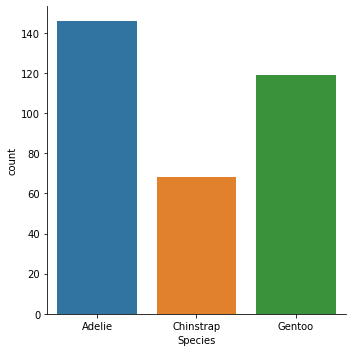

In [87]:
# Add arguments to plot the catplot
sns.catplot(data = penguins, x = "Species", kind = "count")

# Show plot
plt.show()

Now, what if we want to see how the counts change by **island**? We can introduce a new argument: hue. Hue will make a distinction (by colors) for each category of the variable we're adding.

**Arguments**: 
* data = dataframe
* x = "columnName"; count how many times each category is repeated
* hue = "columnName" ; assigns a unique color to each category from this variable
* kind = "graphType"; the type of graph we want to plot, in this case "count"



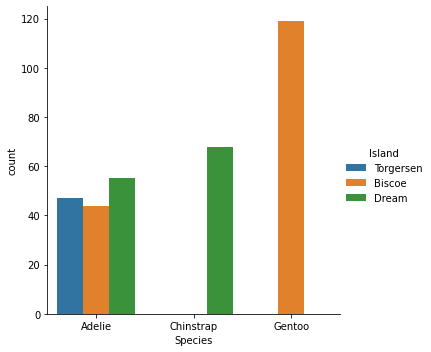

In [90]:
# Add arguments to plot the catplot
sns.catplot(data = penguins, x = "Species", hue = "Island", kind = "count")

# Show plot
plt.show()

What if we also want to see how the data changes by **sex**? We will add one last argument called col, which will help us visualize more than one graph.

**Arguments**: 
* data = dataframe
* x = "columnName"; count how many times each category is repeated
* hue = "columnName" ; assigns a unique color to each category from this variable
* col = Create as many graphs as categories from this variable
* kind = "graphType"; the type of graph we want to plot, in this case "count"

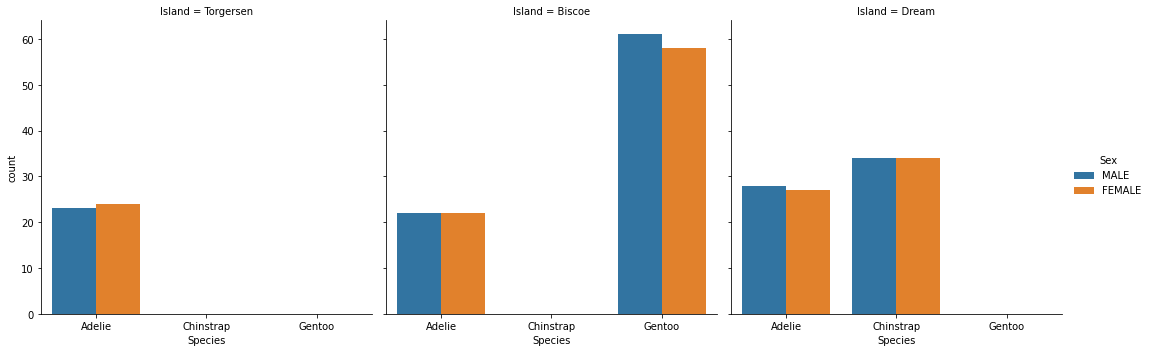

In [91]:
# Add arguments to plot the catplot
sns.catplot(data = penguins, x = "Species", hue = "Sex", col = "Island", kind = "count")

# Show plot
plt.show()

### Histogram plot

Let's recall our previous histogram plot!

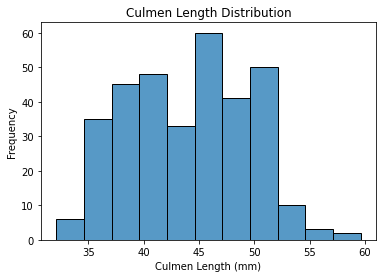

In [68]:
# Add arguments to plot the histogram
sns.histplot(data = penguins, x = "Culmen Length (mm)", bins = "auto")

# Label axis
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Frequency")

# Add title
plt.title("Culmen Length Distribution")

# Show plot
plt.show()

Now, what if we would like to create different histograms for each **island**? We would have to use a new method called FacetGrid, which is designed to visualize multiple plots' grids. The parameters for this method are:

The general structure is saving these different plots into one variable
* myGrids = sns.FacetGrid(arguments...)

**Arguments for FacetGrid:**
* data = dataframe
* col = "columnName" ; creates as many graphs as categories from this variable
* hue = "columnName" ; assigns a unique color to each category from this variable
* palette = "paletteName" ; colors

After that, we would use another method (map) on our faceted grids variable, which will actually map the histograms in each one of them.
* myGrids.map(arguements...)

**Arguments for map:**
* sns.nameOfPlot ; the type of sns plot we are creating, in this case sns.histplot
* "columnName" ; quantitative variable we are plotting from the dataframe

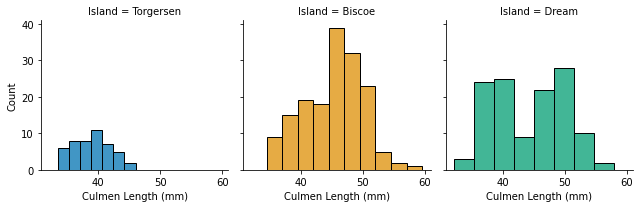

In [95]:
# Store the different grids into one variable
g = sns.FacetGrid(data = penguins, col = "Island", hue = "Island", palette = "colorblind")

# Plot the histograms on the grids
g.map(sns.histplot, "Culmen Length (mm)")

# Show plot
plt.show()

A lot to digest! But play around with other dataframes from our repo and you will get used to the different parameters and functions! 

## Density plot

Let's recall our first density plot!

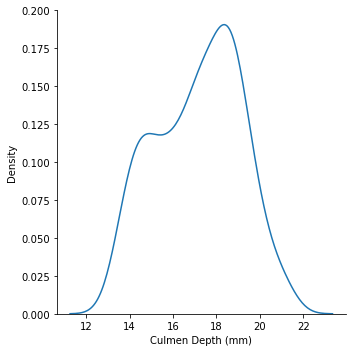

In [74]:
# Add arguments to plot the density plot
sns.displot(data = penguins, x = "Culmen Depth (mm)", kind="kde")

# Show plot
plt.show()

Now, what if we want to see how the distribution changes by **specie**? We would have to add the hue parameter once again.

**Arguments:**
* data = dataframe
* x = "columnName" ; quantitative variable to display
* hue = "columnName" ; assigns a unique color to each category from this variable 
* kind = "graphName" ; the type of graph we're using, for our purposes "kde" (short for kernel distribution estimate)
* palette = "paletteName" ; colors

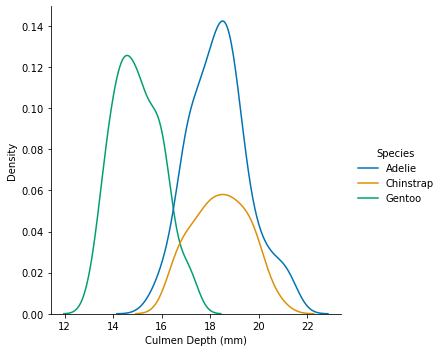

In [98]:
# Add arguments to plot the density plot
sns.displot(penguins, x = "Culmen Depth (mm)", hue = "Species", kind="kde", palette = "colorblind")

# Show plot
plt.show()

Lastly, if we also want to visualize a third variable, and create a plot for each category, we can play around with FacetGrid.

The general structure is saving these different plots into one variable
* myGrids = sns.FacetGrid(arguments...)

**Arguments for FacetGrid:**
* data = dataframe
* col = "columnName" ; creates as many graphs as categories from this variable
* hue = "columnName" ; assigns a unique color to each category from this variable
* palette = "paletteName" ; colors

After that, we would use another method (map) on our faceted grids variable, which will actually map the histograms in each one of them.
* myGrids.map(arguements...)

**Arguments for map:**
* sns.nameOfPlot ; the type of sns plot we are creating, in this case sns.kdeplot
* "columnName" ; quantitative variable we are plotting from the dataframe

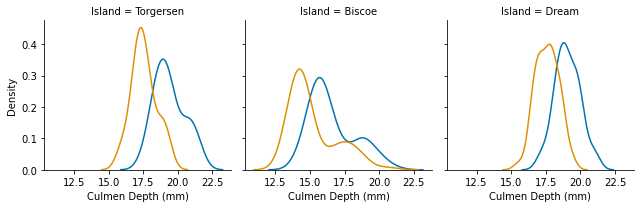

In [101]:
# Store the different grids into one variable
g = sns.FacetGrid(data = penguins, col = "Island", hue = "Sex", palette = "colorblind")

# Plot the distributions on the grids 
g.map(sns.kdeplot, "Culmen Depth (mm)")

# Show the plots
plt.show()

### Scatter plot

Scatter plots are a helpful way to visualize the relationship between two variables in statistics. Using the Matplotlib library, we can create scatter plots for the same Penguins dataset that we have been working with thus far.

**Parameters**: 
* x = quantitative variable of choice from our dataframe
* y = quantitative variable of choice from our dataframe
* c = colors each data point
* marker = symbol to mark each data point
* alpha = a stylistic parameter that changes the transparency of points, and helps us determine where there may be many points on the scatter plot

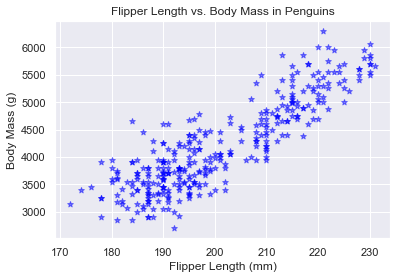

In [66]:
# As always, load libraries
import matplotlib.pyplot as plt
import pandas as pd

# Create the data
penguins = pd.read_csv("penguins_wrangled.csv")

# Draw the scatter plot
plt.scatter(penguins["Flipper Length (mm)"], penguins["Body Mass (g)"], c = "blue", marker = "*", alpha = 0.5)

# Add x-axis and y-axix labels
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

# Add a title
plt.title("Flipper Length vs. Body Mass in Penguins")

# Display the graph
plt.show()

### lm plots
The lm plot displays the scattered data and fits a regression model onto it. It is exactly the same as putting the line of best fit onto our graph, and this process helps to understand the relationship between two variables. The method lmplot( ) takes the input of two column names (x and y) as a string and a DataFrame variable, and by default, fits the regression line. Let's try it out!

**Arguments**: 
* data = dataframe 
* x = "columnName" ; quantitative variable of choice
* y = "columnName" ; quantitative variable of choice

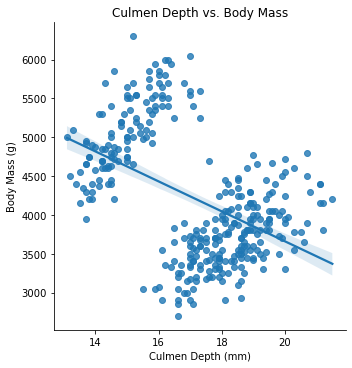

In [102]:
# Add arguments to plot the lm plot
sns.lmplot(data = penguins, x = "Culmen Depth (mm)", y = "Body Mass (g)")

# Add a title
plt.title("Culmen Depth vs. Body Mass")

# Show the plot
plt.show()

If we wanted to remove the regression line from the lmplot, we would be creating a regular scatter plot. We can do so by setting them argument *fig_reg* within sns.lmplot to False. By default, Seaborn includes the line of best fit.

**Arguments**: 
* data = dataframe 
* x = "columnName" ; quantitative variable of choice
* y = "columnName" ; quantitative variable of choice
* fit_reg = False ; to remove regression line

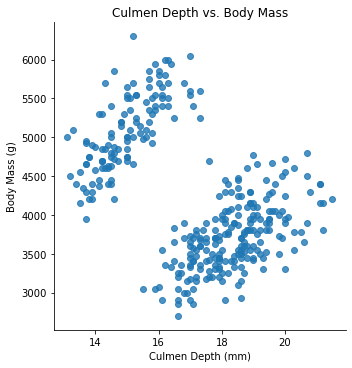

In [117]:
# Add arguments to the lm plot
sns.lmplot(data = penguins, x = "Culmen Depth (mm)", y = "Body Mass (g)", fit_reg = False)

# Add a title
plt.title("Culmen Depth vs. Body Mass")

# Show the plot
plt.show()

Huh, doesn't the above scatterplot look interesting? There are two clusters of data, which might hint that something else is going on in our data. One would assume that there would be a strong, positive association between body mass and culmen depth in penguins, but here we see the opposite. This could be a result of the differences in penguin species, so let's go ahead and add it as another dimension to our plot!

**Arguments**: 
* data = dataframe 
* x = "columnName" ; quantitative variable of choice
* y = "columnName" ; quantitative variable of choice
* hue = "columnName" ; assigns a unique color to each category from this variable

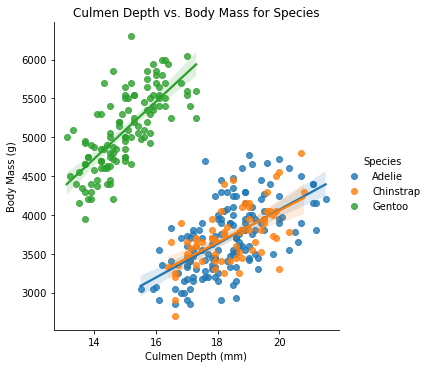

In [104]:
# Add arguments to plot the lm plot 
sns.lmplot(data = penguins, x = "Culmen Depth (mm)", y = "Body Mass (g)", hue = "Species")

# Add a title
plt.title("Culmen Depth vs. Body Mass for Species")

# Display the plot
plt.show()

### Box plot
Box plots, or box-and-whisker plots, are another helpful visualization to understand the distribution of our data. Let's practice making a box plot in Seaborn using the same dataset from our previous example!

**Arguments**: 
* data = dataframe 
* x = "columnName" ; categorical variable of choice
* y = "columnName" ; quantitative variable of choice

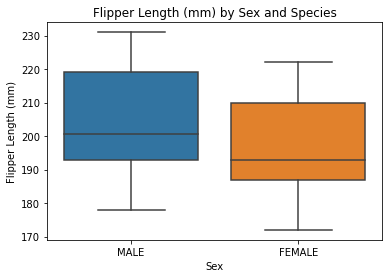

In [105]:
# Create a box plot for the variables "Sex" and "Flipper Length"
sns.boxplot(data = penguins, x = "Sex", y = "Flipper Length (mm)")

# Add a title
plt.title("Flipper Length (mm) by Sex and Species")

# Display the plot
plt.show()

What if we wanted to learn more about how flipper length varies by sex AND by **species**? We can add the "Species" variable to our box plot by adding color, using the hue parameter within sns.boxplot( ). Let's try it out!

**Arguments**: 
* data = dataframe 
* x = "columnName" ; categorical variable of choice
* y = "columnName" ; quantitative variable of choice
* hue = "columName" ; assigns a unique color to each category from this variable

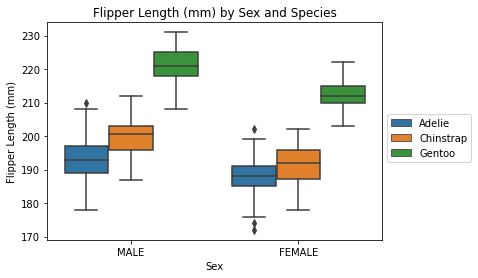

In [106]:
# Create a box plot for the variables "Flipper Length (mm)", "Sex" and "Species"
sns.boxplot(data = penguins, x = "Sex", y = "Flipper Length (mm)", hue = "Species")

# Edits legend so that it does not block the box drawings
plt.legend(bbox_to_anchor = (1, 0.6))

# Add a title
plt.title("Flipper Length (mm) by Sex and Species")

# Display the plot
plt.show()

### Segmented Bar Charts

Segmented bar plots are a final data visualization method that is particularly useful for comparing two categorical variables and one quantitative variable. This dataset is far from creating a perfect example of when to use a segmented bar plot, but for the sake of time, we are going to proceed with this dataset. (We would prefer another dataset for our final materials.) Let's say we were interested in knowing the total body mass of all penguins in this dataset. With a segmented bar plot, we can practice using color and formatting to compare the body mass of different species, and how sex may also play into the overall body mass.

**Parameters for sns.barplot()**: 
* x = categorical variable to compare for body mass
* y = quantitative variable to see a breakdown of
* data = dataframe created by grouping male and female penguins
* color = color assigned to the first and second groups

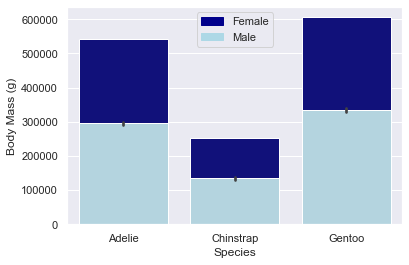

In [60]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# top bar -> sum all values(male=No and male=Yes) to find y position of the bars
total = penguins.groupby('Species')['Body Mass (g)'].sum().reset_index()

# bar chart 1 -> top bars (group of 'male=No')
bar1 = sns.barplot(x = "Species",  y = "Body Mass (g)", data = total, color = 'darkblue')

# bottom bar ->  take only male=Yes values from the data
male = penguins[penguins.Sex == 'MALE']

# bar chart 2 -> bottom bars (group of 'male=Yes')
bar2 = sns.barplot(x = "Species", y = "Body Mass (g)", data = male, estimator = sum, color = 'lightblue')

# Add legend
top_bar = mpatches.Patch(color = 'darkblue', label = 'Female')
bottom_bar = mpatches.Patch(color = 'lightblue', label = 'Male')
plt.legend(handles=[top_bar, bottom_bar])

# Display the graph
plt.show()

## Tips

As you practice the skills learned in this section, please keep in mind the following suggestions:

+ Always remember to load the necessary libraries.
+ Name your variables, dataframes, and labels helpful and informative titles.
+ Remember that Python is case-sensitive, so save yourself the trouble and type carefully. 
+ Don't lose hope if you encounter a warning. Troubleshooting warnings are a great way to learn.
+ If you get stuck, use the help documentation that you learned in our first lecture to help you troubleshoot!
+ If you want extra material on univariate exploratory data analysis, check out the extra material posted on our repo!

## References
Main resources that we used to build this material:

1. Navlani, Avinash, Armando Fandango, and Ivan Idris. 2021. Python Data Analysis. Third Edition. Birmingham: Packt Publishing.

2. Python Data Analysis - Third Edition. (2019). Jupyter Notebook. Packt. https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition/blob/e1cd8029a1830fe5ecc86379ab361d215e71f036/Chapter05/HR_comma_sep.csv. Accessed July 7, 2022.

3. Pandas documentation: https://pandas.pydata.org/docs/

4. Seaborn documentation: https://seaborn.pydata.org/tutorial.html 

5. Stackoverflow: https://stackoverflow.com

6. Geekforgeeks: https://www.geeksforgeeks.org 

7. Pythongraphgallery: https://www.python-graph-gallery.com

8. Matplotlib documentation: https://matplotlib.org/stable/tutorials/index

